In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from scipy.stats import chi2_contingency,chi2
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [16]:
emp_data = pd.read_csv('Employee.csv')
emp_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,22,Associate Degree,Married,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,No,21,Master’s Degree,Divorced,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,11,Bachelor’s Degree,Married,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,No,27,High School,Single,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,71,High School,Divorced,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [104]:
for col in emp_data.columns:
  print('Unique values for ',col,': ',emp_data[col].nunique())

Unique values for  Age :  42
Unique values for  Gender :  2
Unique values for  Years at Company :  51
Unique values for  Job Role :  5
Unique values for  Monthly Income :  9842
Unique values for  Work-Life Balance :  4
Unique values for  Job Satisfaction :  4
Unique values for  Performance Rating :  4
Unique values for  Number of Promotions :  5
Unique values for  Overtime :  2
Unique values for  Distance from Home :  99
Unique values for  Education Level :  5
Unique values for  Marital Status :  3
Unique values for  Number of Dependents :  7
Unique values for  Job Level :  3
Unique values for  Company Size :  3
Unique values for  Company Tenure :  127
Unique values for  Remote Work :  2
Unique values for  Leadership Opportunities :  2
Unique values for  Innovation Opportunities :  2
Unique values for  Company Reputation :  4
Unique values for  Employee Recognition :  4
Unique values for  Attrition :  2


In [ ]:
# we can see that all features are discrete numerical, so we need to find input
# features through chi2 test, not correlation matrix

In [3]:
#getting data shape
emp_data.shape

(74498, 24)

In [68]:
#to see description of numericl column
emp_data.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Attrition
count,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000,74498.000000
mean,38.529746,15.721603,7299.379514,0.832989,49.991584,1.650313,55.727456,0.525222
std,12.083456,11.223744,2152.508566,0.995271,28.513611,1.553608,25.399349,0.499367
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000,0.000000
25%,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000,0.000000
50%,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000,1.000000
75%,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000,1.000000
max,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000,1.000000


In [67]:
#to see description of categorical columns
emp_data.describe(include = 'object')

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
count,74498,74498,74498,74498,74498,74498,74498,74498,74498,74498,74498,74498,74498,74498,74498
unique,2,5,4,4,4,2,5,3,3,3,2,2,2,4,4
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Entry,Medium,No,No,No,Good,Low
freq,40826,19322,28161,37245,44720,50157,22336,37421,29783,37232,60300,70845,62394,37182,29621


In [6]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [14]:
#filtering out null columns
emp_data.isna().sum()[emp_data.isna().sum() != 0]

Work-Life Balance       4
Performance Rating      4
Number of Promotions    5
Education Level         5
Marital Status          4
Number of Dependents    6
Job Level               5
Company Size            2
Remote Work             3
Employee Recognition    2
dtype: int64

In [20]:
emp_data[['Work-Life Balance','Performance Rating','Number of Promotions','Education Level','Marital Status',
'Number of Dependents','Job Level','Company Size','Remote Work','Employee Recognition']].head()

,Work-Life Balance,Performance Rating,Number of Promotions,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Employee Recognition
0,Excellent,Average,2.0,Associate Degree,Married,0.0,Mid,Medium,No,Medium
1,Poor,Low,3.0,Master’s Degree,Divorced,3.0,Mid,Medium,No,Low
2,Good,Low,0.0,Bachelor’s Degree,Married,3.0,Mid,Medium,No,Low
3,Good,High,1.0,High School,Single,2.0,Mid,Small,Yes,Medium
4,Fair,Average,0.0,High School,Divorced,0.0,Senior,Medium,No,Medium


In [21]:
#Number of dependents and Number of Promotions are float64
#filling with mode value for all other object variables

for col in ['Work-Life Balance','Performance Rating','Education Level','Marital Status',
            'Job Level','Company Size','Remote Work','Employee Recognition']:
            emp_data[col] =  emp_data[col].fillna(emp_data[col].mode()[0])

In [22]:
#checking if null values are handled
emp_data.isna().sum()[emp_data.isna().sum() != 0]

Number of Promotions    5
Number of Dependents    6
dtype: int64

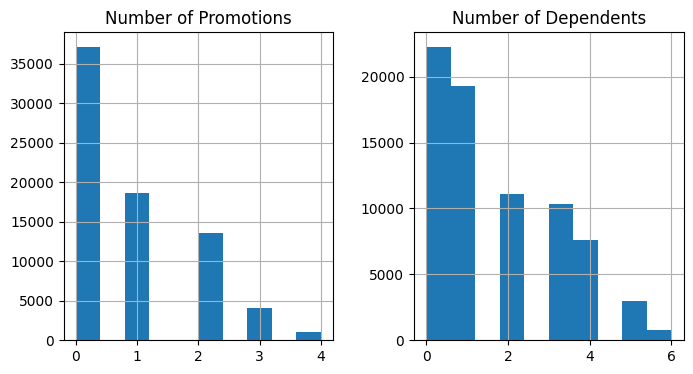

In [30]:
#to understand data distribution in other 2 columns (float type)
data_plot = emp_data[['Number of Promotions','Number of Dependents']]
data_plot.hist(figsize = (8,4));

In [31]:
#figure shows that data is skewed, so use median to replace null values instead of mean
emp_data['Number of Promotions'] = emp_data['Number of Promotions'].fillna(emp_data['Number of Promotions'].median())
emp_data['Number of Dependents'] = emp_data['Number of Dependents'].fillna(emp_data['Number of Dependents'].median())

In [32]:
#checking if null values are handled
emp_data.isna().sum()[emp_data.isna().sum() != 0]

Series([], dtype: int64)

In [33]:
#removing Employee ID (insignificant feature)
emp_data.drop(['Employee ID'], axis = 1, inplace = True)

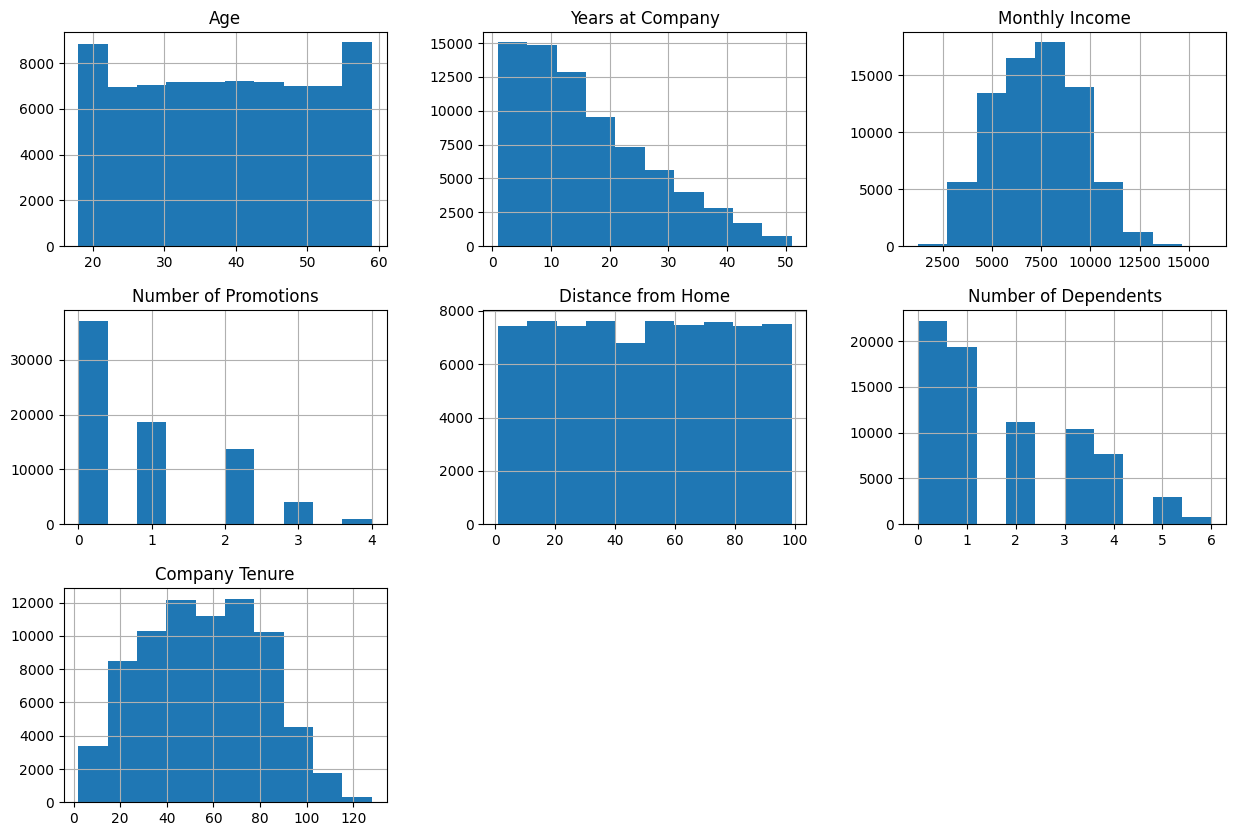

In [39]:
#exploring data distribution in numerical columns
freq_data = emp_data.select_dtypes(['float64', 'int64'])
freq_data.hist(figsize = (15,10));

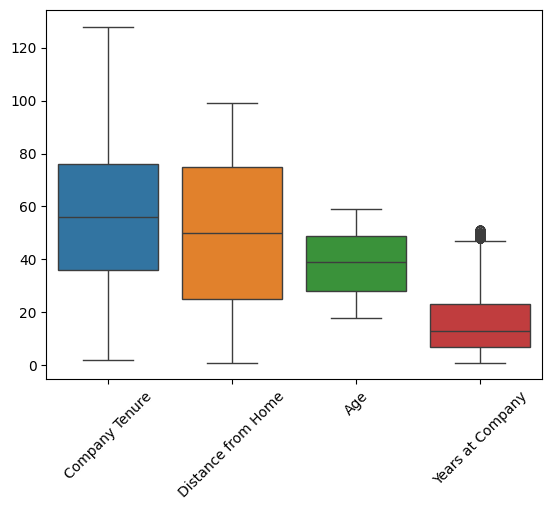

In [130]:
#checking outliers in continuous numerical columns:
for col in [['Company Tenure','Distance from Home', 'Age', 'Years at Company']]:
  sns.boxplot(freq_data[col])
  plt.xticks(rotation = 45)

In [121]:
#handling outliers in SW

q1 = np.percentile(emp_data['Years at Company'], 25, method = 'midpoint')
q3 = np.percentile(emp_data['Years at Company'], 75, method = 'midpoint')
print('q1 for SW: ',q1,'\nq3 for SW: ',q3)
IQR = q3-q1
print('IQR for SW: ',IQR)
low_lim = q1 - 1.5*IQR
up_lim = q3 + 1.5*IQR
print('lower whisker for SW: ', low_lim,'\nupper whisker for SW :', up_lim)

outlier =[]
for x in emp_data['Years at Company']:
  if(x<low_lim or x>up_lim):
    outlier.append(x)
print('Outlier for Years at Company: ',outlier)

q1 for SW:  7.0 
q3 for SW:  23.0
IQR for SW:  16.0
lower whisker for SW:  -17.0 
upper whisker for SW : 47.0
Outlier for Years at Company:  [48, 49, 49, 48, 48, 49, 50, 48, 50, 48, 48, 49, 48, 51, 48, 48, 51, 48, 48, 48, 48, 49, 49, 50, 51, 48, 48, 50, 48, 49, 48, 49, 48, 48, 49, 50, 48, 48, 48, 49, 49, 49, 48, 49, 50, 51, 49, 48, 51, 49, 49, 48, 50, 50, 49, 49, 49, 50, 48, 48, 48, 48, 48, 49, 48, 51, 48, 49, 50, 49, 48, 48, 48, 49, 51, 48, 50, 50, 50, 50, 50, 48, 49, 48, 49, 49, 50, 49, 51, 48, 50, 49, 48, 48, 50, 48, 49, 48, 48, 48, 48, 50, 51, 49, 49, 49, 48, 51, 48, 49, 49, 50, 50, 48, 51, 49, 49, 48, 48, 48, 48, 49, 50, 49, 48, 49, 50, 48, 48, 49, 48, 49, 48, 48, 51, 49, 50, 48, 48, 48, 50, 48, 51, 50, 48, 49, 49, 49, 51, 49, 48, 49, 51, 48, 50, 50, 49, 48, 48, 48, 49, 48, 48, 51, 48, 49, 48, 48, 48, 49, 48, 51, 49, 49, 48, 48, 50, 48, 48, 49, 48, 48, 49, 49, 50, 50, 49, 48, 49, 48, 48, 48, 50, 51, 50, 49, 48, 50, 50, 48, 48, 50, 49, 49, 48, 49, 48, 48, 48, 49, 49, 48, 48, 49, 49

In [122]:
#data clipping to optimize outliers

emp_data['Years at Company'] = emp_data['Years at Company'].clip(lower = low_lim, upper = up_lim)

In [123]:
#Label Encoding target column for checking heatmap
x_le = LabelEncoder()
emp_data['Attrition'] = x_le.fit_transform(emp_data['Attrition'])

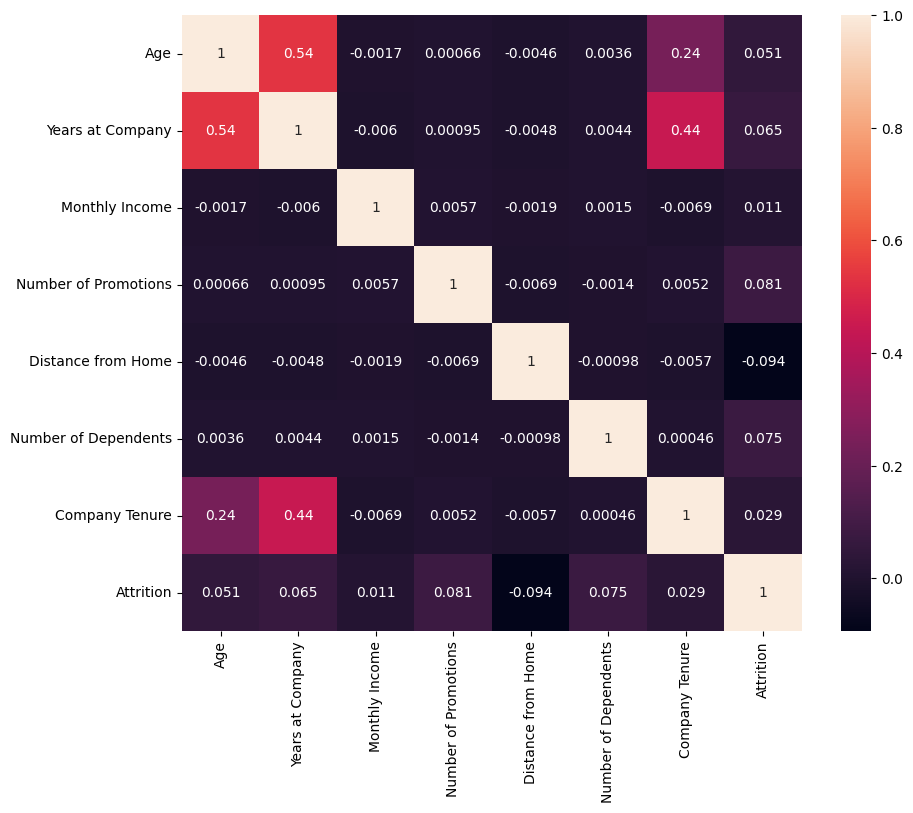

In [70]:
#checking correlation for numerical features
corr_data = emp_data.select_dtypes(['float64', 'int64'])
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_data.corr(), annot = True)
plt.show()

In [ ]:
#there is no much relation for numerical data with target variable

In [106]:
#doing chi2 test for categorical data and discrete numerical data
chi2_cols = ['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance',
       'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']
for col in chi2_cols:
    print("\nFeatures checked: ", col, ' and Attrition')
    cont_table = pd.crosstab(index=emp_data[col],columns=emp_data['Attrition'])
    chi2_value, p_val, dof, expected_table = chi2_contingency(cont_table)
    print(f'chi2 value: {chi2_value}')
    print(f'p value: {p_val}')
    if p_val <= 0.05:
      print(f'There exist some relation between features (null hypothesis rejected)')
    else:
      print(f'Two features are not related (Accept null hypothesis)')


Features checked:  Age  and Attrition
chi2 value: 359.69516199274574
p value: 1.515128905250801e-52
There exist some relation between features (null hypothesis rejected)

Features checked:  Gender  and Attrition
chi2 value: 754.0995584972316
p value: 5.1524427303371715e-166
There exist some relation between features (null hypothesis rejected)

Features checked:  Years at Company  and Attrition
chi2 value: 601.6973482657395
p value: 1.1660050969822874e-95
There exist some relation between features (null hypothesis rejected)

Features checked:  Job Role  and Attrition
chi2 value: 14.777672160140252
p value: 0.005185265173065112
There exist some relation between features (null hypothesis rejected)

Features checked:  Monthly Income  and Attrition
chi2 value: 9953.599991008967
p value: 0.2106075092657101
Two features are not related (Accept null hypothesis)

Features checked:  Work-Life Balance  and Attrition
chi2 value: 2912.8276545278995
p value: 0.0
There exist some relation between fe

In [ ]:
#employee recognition, monthly income is not related to Attrition

In [145]:
X_emp = emp_data[['Age', 'Gender', 'Years at Company', 'Job Role', 'Work-Life Balance',
       'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation']]
y = emp_data['Attrition']

In [146]:
X = X_emp.copy()

#label encode object variables
le = LabelEncoder()
col_toencode = X.select_dtypes(['object'])
for col in col_toencode.columns:
  X[col] = le.fit_transform(X[col])

In [140]:
#standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(X)
x_sc = pd.DataFrame(x_sc)
#it was seen that scaling reduced the accuracy, so not taking x_sc in modelling

In [141]:
#defining a function for score comparion in each model
def Score_Comparison(y_test, pred_y):
  print('Accuracy score: ', accuracy_score(y_test,pred_y))
  print('Precision score: ', precision_score(y_test,pred_y, average = 'micro'))
  print('Recall score: ', recall_score(y_test,pred_y, average = 'micro'))
  print('F1 score: ', f1_score(y_test,pred_y, average = 'micro'))

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
#Logistic regression model
clf = LogisticRegression()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
Score_Comparison(y_test, y_pred)

Accuracy score:  0.7220805369127516
Precision score:  0.7220805369127516
Recall score:  0.7220805369127516
F1 score:  0.7220805369127516


In [165]:
rf_cl = RandomForestClassifier(random_state = 42, n_estimators=100, max_depth = 10, criterion='gini')
rf_cl.fit(X_train, y_train)
y_pred_rf = rf_cl.predict(X_test)
Score_Comparison(y_test, y_pred_rf)

Accuracy score:  0.7521476510067114
Precision score:  0.7521476510067114
Recall score:  0.7521476510067114
F1 score:  0.7521476510067115


In [168]:
#stratified kfold for the best model
stratified_cv = StratifiedKFold(n_splits = 50)
cv_score_str = cross_val_score(rf_cl, X,y, cv = stratified_cv)
print('Mean score: ',cv_score_str.mean())
print('Std deviation: ',cv_score_str.std())

Mean score:  0.7475233321764528
Std deviation:  0.008893801714536423


In [ ]:
#hyper parameter tuning for the best model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 8, 12]
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
random_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_iter=100)

# Fit the search object to the training data
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

In [167]:
dt_cl = DecisionTreeClassifier(random_state = 42)
dt_cl.fit(X_train, y_train)
y_pred_dt = dt_cl.predict(X_test)
Score_Comparison(y_test, y_pred_dt)

Accuracy score:  0.6761073825503355
Precision score:  0.6761073825503355
Recall score:  0.6761073825503355
F1 score:  0.6761073825503355


Text(0, 0.5, 'Accuracy')

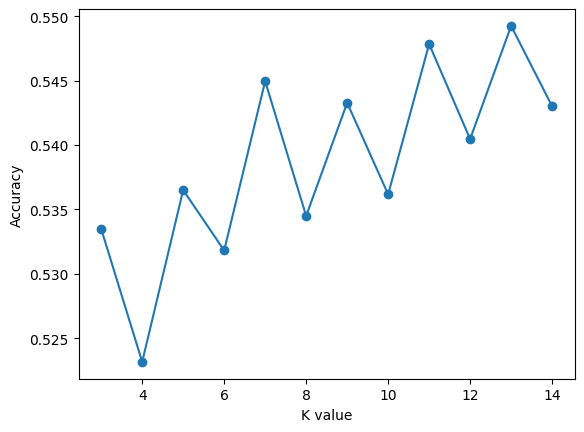

In [160]:
from sklearn.neighbors import KNeighborsClassifier
metric_k =[]
neighbors = np.arange(3,15)
for k in neighbors:
  classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski', p =2)
  classifier.fit(X_train, y_train)
  y_pred_knn = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [161]:
classifier= KNeighborsClassifier(n_neighbors=13,metric='minkowski', p =2)
classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)

Score_Comparison(y_test, y_pred_knn)

Accuracy score:  0.549261744966443
Precision score:  0.549261744966443
Recall score:  0.549261744966443
F1 score:  0.549261744966443


**Conclusion**: After selecting input features according to correlation and chi2 contingency tests, it is found that Random Forest gave the maximum accuracy score. Also did stratified k-fold and hyper parameter tuning to select best parameters.